<a href="https://colab.research.google.com/github/yashaswi2000/Text_summarisation/blob/master/Ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os

In [0]:
 ! pip install -q kaggle

In [11]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"makulayashaswi","key":"bb915eb90d35cc5dddc88c940585192e"}'}

In [13]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d pariza/bbc-news-summary

 56% 5.00M/8.91M [00:00<00:00, 51.6MB/s]
100% 8.91M/8.91M [00:00<00:00, 56.6MB/s]


In [16]:
!unzip bbc-news-summary.zip

Streaming output truncated to the last 5000 lines.
  inflating: BBC News Summary/Summaries/sport/364.txt  
  inflating: BBC News Summary/Summaries/sport/365.txt  
  inflating: BBC News Summary/Summaries/sport/366.txt  
  inflating: BBC News Summary/Summaries/sport/367.txt  
  inflating: BBC News Summary/Summaries/sport/368.txt  
  inflating: BBC News Summary/Summaries/sport/369.txt  
  inflating: BBC News Summary/Summaries/sport/370.txt  
  inflating: BBC News Summary/Summaries/sport/371.txt  
  inflating: BBC News Summary/Summaries/sport/372.txt  
  inflating: BBC News Summary/Summaries/sport/373.txt  
  inflating: BBC News Summary/Summaries/sport/374.txt  
  inflating: BBC News Summary/Summaries/sport/375.txt  
  inflating: BBC News Summary/Summaries/sport/376.txt  
  inflating: BBC News Summary/Summaries/sport/377.txt  
  inflating: BBC News Summary/Summaries/sport/378.txt  
  inflating: BBC News Summary/Summaries/sport/379.txt  
  inflating: BBC News Summary/Summaries/sport/380.txt

In [17]:
data_path = "./BBC News Summary"
folders = os.listdir(data_path)
article_path = os.path.join(data_path,folders[0])
summary_path = os.path.join(data_path,folders[1])
categories = os.listdir(article_path)
article_list = []
summary_list = []
for i in categories:
  article_files = os.listdir(article_path + '/' + i)
  summary_files = os.listdir(summary_path + '/' + i)
  for j in range(len(article_files)):
    file_path_1 = article_path + '/' + i + '/' + article_files[j]
    file_path_2 = summary_path + '/' + i + '/' + summary_files[j]
    #print(file_path_1)
    try:
        
        f = open(file_path_1)
        article_list.append(' '.join(f.read().splitlines()))
        f = open(file_path_2)
        summary_list.append(' '.join(f.read().splitlines()))
        
    except:
        print("error") 
d = {'article':article_list,'summary':summary_list}
df = pd.DataFrame(d)
df

error


,article,summary
0,Ivanovic seals Canberra victory Serbia's Ana ...,Serbia's Ana Ivanovic captured her first WTA t...
1,Wales want rugby league training Wales could ...,"Kel Coslett, who famously moved from Wales to ..."
2,Time to get tough on friendlies? For an inter...,Some people have been saying it would be bette...
3,Disappointed Scott in solid start Allan Scott...,Vivancos slashed his personal best to equal th...
4,Laporte tinkers with team France coach Bernar...,Other changes see Julien Laharrague win his fi...
...,...,...
2219,Millions 'to lose textile jobs' Millions of t...,The WTO said that many developing countries su...
2220,Business fears over sluggish EU economy As Eu...,"In Germany, industry is exporting more these d..."
2221,Warning over US pensions deficit Taxpayers ma...,With the Pension Benefit Guaranty Corporation ...
2222,Christmas shoppers flock to tills Shops all o...,A spokesman for Manchester's Trafford Centre s...


In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [19]:
df['article'][:10]

0    Ivanovic seals Canberra victory  Serbia's Ana ...
1    Wales want rugby league training  Wales could ...
2    Time to get tough on friendlies?  For an inter...
3    Disappointed Scott in solid start  Allan Scott...
4    Laporte tinkers with team  France coach Bernar...
5    Britain boosted by Holmes double  Athletics fa...
6    Gebrselassie in London triple bid  Double Olym...
7    Pountney handed ban and fine  Northampton coac...
8    Merritt close to indoor 400m mark  Teenager La...
9    Owen determined to stay in Madrid  England for...
Name: article, dtype: object

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [22]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['article']:
    cleaned_text.append(text_cleaner(t))

cleaned_text[0]

'ivanovic seals canberra victory serbia ana ivanovic captured first wta title straight sets victory hungarian melinda czink final canberra classic year old took minutes take match ivanovic beat czink last round qualifying hungarian made main draw lucky loser katarina srebotnik withdrew injured ivanovic said really nervous beginning pulled much wrong junior wimbledon finalist last year added first wta title win really given energy practice improve ivanovic play seed iveta benesova czech republic first round said australian open melbourne'

In [23]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(summary_cleaner(t))

cleaned_summary[0]

'serbia ana ivanovic captured her first wta title with straight sets victory over hungarian melinda czink in the final of the canberra classic ivanovic beat czink in the last round of qualifying but the hungarian made the main draw as lucky loser after katarina srebotnik withdrew injured junior wimbledon finalist last year she added it my first wta title and to win it has really given me more energy to practice and improve '

In [0]:
df['cleaned_article']=cleaned_text
df['cleaned_summary']=cleaned_summary

In [0]:
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [28]:
for i in range(5):
    print("article:",df['cleaned_article'][i])
    print("Summary:",df['cleaned_summary'][i])
    print("\n")

article: ivanovic seals canberra victory serbia ana ivanovic captured first wta title straight sets victory hungarian melinda czink final canberra classic year old took minutes take match ivanovic beat czink last round qualifying hungarian made main draw lucky loser katarina srebotnik withdrew injured ivanovic said really nervous beginning pulled much wrong junior wimbledon finalist last year added first wta title win really given energy practice improve ivanovic play seed iveta benesova czech republic first round said australian open melbourne
Summary: _START_ serbia ana ivanovic captured her first wta title with straight sets victory over hungarian melinda czink in the final of the canberra classic ivanovic beat czink in the last round of qualifying but the hungarian made the main draw as lucky loser after katarina srebotnik withdrew injured junior wimbledon finalist last year she added it my first wta title and to win it has really given me more energy to practice and improve  _END_

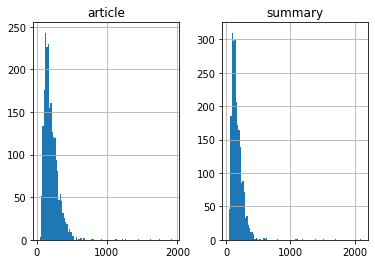

In [35]:
import matplotlib.pyplot as plt
article_word_count = []
summary_word_count = []

for i in df['cleaned_article']:
      article_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'article':article_word_count, 'summary':summary_word_count})
length_df.hist(bins = 100)
plt.show()

In [39]:
max(article_word_count)


1926

In [40]:
max(summary_word_count)

2106